### Logistic Regression Modles 

- explore logistic regression with l1 and l2 penalty, and different magnitude of C values
- explore other parameter settings that could potentially affect your model performance, find a model that works best on your data
- interpret model performance and discuss pros and cons of each model


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Data overview

* Link of my dataset: https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned *

In [3]:
# read data from file to a pandas dataframe
path = '/Users/pro/Desktop/Winter 2024/30100/30100_Yunrui/Reddit_depression.csv'
df = pd.read_csv(path) 

In [4]:
# check the shape of the data frame
print(df.shape)

(7731, 2)


In [5]:
# get an overview of the top-n rows/samples
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [6]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [7]:
# this dataset has been cleaned, so there is no missing value
null_sum = df.isnull().sum()
null_sum

clean_text       0
is_depression    0
dtype: int64

In [8]:
# check the data type of each column
# find out the clean_text is not string type, but we need string for text analysis
df.dtypes 

clean_text       object
is_depression     int64
dtype: object

In [9]:
# convert clean_text to string type
df['clean_text'] = df['clean_text'].astype('string')
df.dtypes

clean_text       string[python]
is_depression             int64
dtype: object

<Axes: xlabel='is_depression', ylabel='count'>

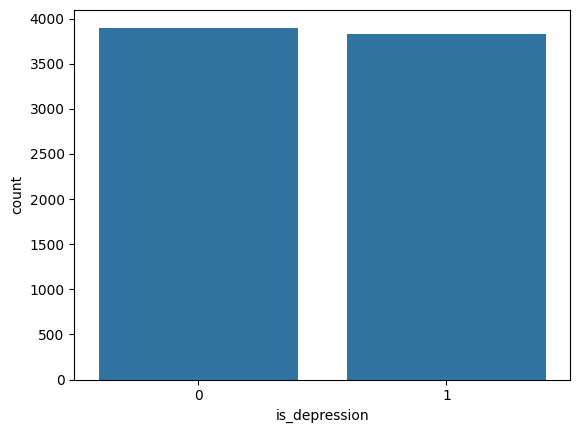

In [10]:
# this indicates that our dataset is pretty balanced
sns.countplot(data=df,x="is_depression")

#### Text transformation 
- tokenization, stemming, lemmatization

In [11]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [12]:
# lower case all words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [13]:
def remove_non_alphabetic(text):
    return ''.join(char if char.isalpha() or char.isspace() else '' for char in text)

In [14]:
# remove non alphabetic characters
# wwe also see that the sentence has been stemmed, we only need to lemmatize it
df['clean_text'] = df['clean_text'].apply(remove_non_alphabetic)
df['clean_text'][3]

'i ve kind of stuffed around a lot in my life delaying the inevitable of having to work a job and be a responsible adult and i m but the longest i ve ever held a job wa  month it wasn t that i m lazy i wa always doing other thing i enjoy but i know now unemployment ha caused most of my depression recently i just feel utterly hopeless when i think soon enough i ll have to move out on my own in some shitty house working a job i couldn t care le about to me it just seems like the perfect recipe to depression'

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
# tokenize, lemmatize the text
text_lst = []
for i in df['clean_text']:
    tokens = word_tokenize(i)
    text = [lemmatizer.lemmatize(word) for word in tokens]
    text = " ".join(text)
    text_lst.append(text)

In [17]:
len(text_lst)

7731

#### Feature Engineering
- CountVectorizer
- TfidfVectorizer

*CountVectorizer*

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer = CountVectorizer(min_df=10, max_df=0.8,ngram_range=(1,1),binary=False,stop_words='english',max_features=1000)
X = vectorizer.fit_transform(text_lst)

In [20]:
# check the feature matrix of the vectorized corpus
X.shape

(7731, 1000)

In [21]:
# check the extracted features during the vectorization
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['able', 'absolutely', 'abuse', 'abusive', 'accept', 'accident',
       'account', 'act', 'action', 'actually', 'add', 'adhd', 'adult',
       'advice', 'affect', 'afford', 'afraid', 'age', 'ago', 'air',
       'alcohol', 'alive', 'allowed', 'alot', 'amazing', 'amp', 'anger',
       'angry', 'annoying', 'answer', 'antidepressant', 'anxiety',
       'anxious', 'anybody', 'anymore', 'anyways', 'apart', 'apartment',
       'apparently', 'appointment', 'appreciate', 'area', 'aren', 'arm',
       'ask', 'asked', 'asking', 'asleep', 'attack', 'attempt',
       'attempted', 'attention', 'avoid', 'awake', 'aware', 'away',
       'awful', 'awkward', 'baby', 'bad', 'badly', 'bar', 'barely',
       'basic', 'basically', 'bathroom', 'battle', 'bc', 'beat',
       'beautiful', 'bed', 'begin', 'beginning', 'believe', 'best',
       'better', 'big', 'biggest', 'bipolar', 'birthday', 'bit', 'black',
       'blame', 'blood', 'body', 'book', 'bored', 'boring', 'born', 'bos',
       'bother', 'boug

In [22]:
def get_topn_features(X, feature_names, topn=10):
    """
    Inputs:
        X: feature matrix
        feature_names: extracted features during vectorization
        topn: the number of most frequent features to return
    Outputs:
        topn most frequent features and their frequency
    """
    feature_ct = np.asarray(np.sum(X, axis=0)).reshape(-1)

    feature_freq = []
    
    for i in np.argsort(feature_ct)[::-1][:topn]:
        feature_freq.append({'feature':feature_names[i], 'frequency':feature_ct[i]})
    
    return pd.DataFrame(feature_freq)

In [23]:
get_topn_features(X, feature_names, topn=20)

,feature,frequency
0,just,4527
1,wa,3810
2,like,3584
3,feel,3227
4,don,3029
5,want,2292
6,know,2283
7,life,2147
8,ve,2096
9,time,2070


In [24]:
# vectorize the corpus in order to use it in the model later
matrix_CV = vectorizer.fit_transform(text_lst).toarray() 

In [25]:
df_CV = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

*TfidfVectorizer*

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorizer2 = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), min_df=10, max_df=0.8, max_features=1000)

In [28]:
X = vectorizer2.fit_transform(text_lst)
X.shape

(7731, 1000)

In [29]:
vectorizer2.get_feature_names_out()

array(['able', 'absolutely', 'abuse', 'abusive', 'accept', 'accident',
       'account', 'act', 'action', 'actually', 'add', 'adhd', 'adult',
       'advice', 'affect', 'afford', 'afraid', 'age', 'ago', 'air',
       'alcohol', 'alive', 'allowed', 'alot', 'amazing', 'amp', 'anger',
       'angry', 'annoying', 'answer', 'antidepressant', 'anxiety',
       'anxious', 'anybody', 'anymore', 'anyways', 'apart', 'apartment',
       'apparently', 'appointment', 'appreciate', 'area', 'aren', 'arm',
       'ask', 'asked', 'asking', 'asleep', 'attack', 'attempt',
       'attempted', 'attention', 'avoid', 'awake', 'aware', 'away',
       'awful', 'awkward', 'baby', 'bad', 'badly', 'bar', 'barely',
       'basic', 'basically', 'bathroom', 'battle', 'bc', 'beat',
       'beautiful', 'bed', 'begin', 'beginning', 'believe', 'best',
       'better', 'big', 'biggest', 'bipolar', 'birthday', 'bit', 'black',
       'blame', 'blood', 'body', 'book', 'bored', 'boring', 'born', 'bos',
       'bother', 'boug

In [30]:
df_TF = pd.DataFrame(X.toarray(), columns=vectorizer2.get_feature_names_out())

In [31]:
# vectorize the corpus in order to use it in the model later
matrix2_TF = X.toarray()

#### Logistic Regression

- ### CountVectorizer Matrix 

In [34]:
#  Get the input feature matrix and target variable, prepare for model fitting
x1 = matrix_CV
y1 = df['is_depression']
x1.shape, y1.shape
# split the data into training and testing set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
x1_train.shape, x1_test.shape

((5411, 1000), (2320, 1000))

In [41]:
# fit the logistic regression model without any regularization
lg_None = LogisticRegression(random_state=0, solver='liblinear',).fit(x1_train, y1_train)
score1 = np.round(lg_None.score(x1_test, y1_test), 3)
score1

0.956

In [43]:
# fit the logistic regression model with L1 regularization
lg_L1 = LogisticRegression(random_state=0, solver='liblinear', penalty='l1').fit(x1_train, y1_train)
score2 = np.round(lg_L1.score(x1_test, y1_test), 3)
score2

0.954

In [44]:
# fit the logistic regression model with L2 regularization
lg_L2 = LogisticRegression(random_state=0, solver='liblinear', penalty='l2').fit(x1_train, y1_train)
score3 = np.round(lg_L2.score(x1_test, y1_test), 3)
score3

0.956

In [53]:
# change the class weight to balanced
lg_1 = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced').fit(x1_train, y1_train)
score4 = np.round(lg_1.score(x1_test, y1_test), 3)
score4

0.956

In [46]:
# do not fit intercept 
lg_2 = LogisticRegression(random_state=0, solver='liblinear', fit_intercept=False).fit(x1_train, y1_train)
score5 = np.round(lg_2.score(x1_test, y1_test), 3)
score5

0.884

In [47]:
# different complexity of the model
lg_3 = LogisticRegression(random_state=0, solver='liblinear', C=0.1).fit(x1_train, y1_train)
score6 = np.round(lg_3.score(x1_test, y1_test), 3)
lg_4 = LogisticRegression(random_state=0, solver='liblinear', C=10).fit(x1_train, y1_train)
score7 = np.round(lg_4.score(x1_test, y1_test), 3)
lg_5 = LogisticRegression(random_state=0, solver='liblinear', C=100).fit(x1_train, y1_train)
score8 = np.round(lg_5.score(x1_test, y1_test), 3)
score6, score7, score8  

(0.952, 0.947, 0.925)

- ### TfidfVectorizer Matrix

In [48]:
#  Get the input feature matrix and target variable, prepare for model fitting
x2 = matrix2_TF
y2 = df['is_depression']
x2.shape, y2.shape
# split the data into training and testing set
x2_train, x2_test, y2_train, y2_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
x2_train.shape, x2_test.shape

((5411, 1000), (2320, 1000))

In [51]:
# fit the logistic regression model without any regularization
lg_tf_None = LogisticRegression(random_state=0, solver='liblinear',).fit(x2_train, y2_train)
score9 = np.round(lg_tf_None.score(x2_test, y2_test), 3)
score9

0.956

In [54]:
# fit the logistic regression model with L1 regularization
lg_tf_L1 = LogisticRegression(random_state=0, solver='liblinear', penalty='l1').fit(x2_train, y2_train)
score10 = np.round(lg_tf_L1.score(x2_test, y2_test), 3)
score9

0.956

In [55]:
# fit the logistic regression model with L2 regularization
lg_tf_L2 = LogisticRegression(random_state=0, solver='liblinear', penalty='l2').fit(x2_train, y2_train)
score11 = np.round(lg_tf_L2.score(x2_test, y2_test), 3)
score11

0.956

In [56]:
# change the class weight to balanced
lg_tf_1 = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced').fit(x2_train, y2_train)
score12 = np.round(lg_tf_1.score(x2_test, y2_test), 3)
score12

0.956

In [57]:
# do not fit intercept 
lg_tf_L1 = LogisticRegression(random_state=0, solver='liblinear', fit_intercept=False).fit(x2_train, y2_train)
score13 = np.round(lg_tf_L1.score(x2_test, y2_test), 3)
score13

0.884

In [58]:
# different complexity of the model
lg_tf_L2 = LogisticRegression(random_state=0, solver='liblinear', C=0.1).fit(x2_train, y2_train)
score14 = np.round(lg_tf_L2.score(x2_test, y2_test), 3)
lg_tf_L3 = LogisticRegression(random_state=0, solver='liblinear', C=10).fit(x2_train, y2_train)
score15 = np.round(lg_tf_L3.score(x2_test, y2_test), 3)
lg_tf_L4 = LogisticRegression(random_state=0, solver='liblinear', C=100).fit(x2_train, y2_train)
score16 = np.round(lg_tf_L4.score(x2_test, y2_test), 3)
score14, score15, score16

(0.952, 0.947, 0.925)

### Summary 

- After performing various logistic regression models by adjusting penalties, complexity, and balanced weights, it became evident that the default settings actually yield the best results for our sample. 
- Moreover, the TfidfVectorizer and CountVectorizer exhibit no substantial differences; this finding aligns with results observed when fitting tree models. When compared to tree models, logistic regression demonstrates an overall superior performance. This can be attributed to its ability to handle both binary classification efficiently. 
- Finally, the reason why logistic regression outperforms other models overall lies in the nature of the question I sought to address with this dataset: building a depression detection model based on textual data. Given that this is a classic classification scenario with a binary dependent variable, logistic regression emerges as an ideal choice. Its ability to predict the likelihood of depression for each text entry makes it particularly well-suited for this task, thus solidifying its superiority in addressing the underlying question.

### Additionally, logistic regression offers several advantages:

Pros:
- Regularization: By adjusting L1 and L2 penalties, logistic regression can effectively prevent overfitting and improve generalization performance.
- Probability Estimation: Logistic regression outputs probabilities of class membership, enabling decision-making based on confidence levels.
- the complexity parameter 'C' in logistic regression provides a means to control the balance between model complexity and generalization performance, allowing practitioners to tailor the model to the specific characteristics of the dataset and the problem at hand.

Cons:
- Assumption of Linearity: Logistic regression assumes a linear relationship between predictor variables, which may not always hold true in practice.
- Logistic regression is less flexible in capturing complex, non-linear relationships compared to some other machine learning algorithms.
- High multicollinearity among predictor variables can lead to unstable coefficient estimates and reduced interpretability.